# Análise exploratória dos dados - EDA (SCDSII)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Crime Incident Reports, Boston, MA

Este conjunto de dados é um relatórios de incidentes de crime em Boston no decorrer dos anos que compreende do início de de 2015 até o presente momento. Este fora obtido e preparado diretamente pelo Departamente de polícia de Boston. O conjunto de dados original está disponível <a href='https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system'>aqui</a>.<br/> (Tradução livre)

<a href='https://www.kaggle.com/zer0state/crime-incident-reports-august-2015-to-date'>Link do data set no kaggle</a> 

## Início da Análise

In [ ]:
df = pd.read_csv('/kaggle/input/crime-incident-reports-august-2015-to-date/tmpkrh6apk1.csv')
df_raw = df.copy()

In [ ]:
# Primeiro contato de fato com a base, olhando brevemente as colunas e seus respectivos valores
df.sample(5).T

## Breve descrição das variáveis ##

   - **INCIDENT_NUMBER**: Identificador único do chamado.
   
   - **OFFENSE_CODE**: Número da infração dentro do código penal, onde irá conter as infrações reconhecidas na jurisdição, multas que podem ser impostas por essa infração e algumas disposições gerais tais como: definições e proibições de processos retroativos.
   
   - **OFFENSE_CODE_GROUP**: Grupo de infrações do qual aquela infração pertence dentro do código penal.
   
   - **OFFENSE_DESCRIPTION**: Descrição da infração.
   
   - **DISTRICT**: Distrito policial responsável pela ocorrência. 
   
   - **REPORTING_AREA**: Número associado a área de onde o chamado fora feito.
   
   - **SHOOTING**: Informa se houve troca de tiro ou não (Y/NaN)  
   
   - **OCCURRED_ON_DATE**: Data da ocorrência.
   
   - **YEAR**: Ano da ocorrência.
   
   - **MONTH**: Mês da ocorrência.
   
   - **DAY_OF_WEEK**: Dia da semana da ocorrência.
   
   - **HOUR**: Hora da ocorrência.
   
   - **UCR_PART**: _Uniform Crime Reporting (UCR) Program_ agrega dados oficiais de crimes nos estados unidos os quais são publicados pelo FBI, o UCR conta com os esforços e a coperação estatística de aproximadamente 18.000 cidades, universidades e faculdades, além de Agências, municipais, estatais, tribais e federais, de aplicação da lei, voluntariamente reportando dados sobre crimes que chamaram atenção. A fim de relatar as infrações criminais estes reportes são dividido em _Part I offenses_, _Part II offenses_. Há também neste data set _Part III offenses_. 
   
   - **STREET**: Informa a rua ou a avenida onde ocorreu a infração.
   
   - **Lat**: Informa a latitude do local do ocorrido.
   
   - **Long**: Informa a longitude do local do ocorrido.
   
   - **Location** Informa as coordenadas do local do ocorrido.

In [ ]:
# Informações sobre as colunas
df.info()

## Analisando os valores que estão faltando ## 

Darante a análise inicial, verifiquei que existiam alguns valores faltandos, vamos analisá-los.

In [ ]:
total_missing_data = df.isnull().sum().sort_values(ascending=False)
percent_missing_data = np.round(df.isnull().sum() / df.isnull().count().sort_values(ascending=False) * 100, 2)
missing_data = pd.concat([total_missing_data, percent_missing_data], axis=1, keys=['Total', 'Porcentagem'], sort=False)
display(missing_data)

- Variável **SHOOTING**

Analisando esta variável, verifiquei que haviam três possiveis valores:<br/>
<br/>
1º: 'Y' (Registros onde houve troca de tiro)<br/>
2º: NaN (Registros onde não houve troca de tiro ou houve alguma falha no preenchimento deste campo)

Por este motivo, através deste campo não foi possível  diferênciar quando não houve troca de tiro ou quando de fato o valor do campo é inexistentes, fazendo assim com que esta coluna não seja interessante para se considerar em análises mais aprofundadas, tornando preferível o descarte da mesma.

In [ ]:
#Plotando gráfico que mostra a diferença na quantidade entre os campos com valores faltando e os campos com valores preenchidos

shooting_missing_values = total_missing_data['SHOOTING']
shooting_non_missing_values = df['SHOOTING'].value_counts()[0]

f, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=['Valores Ausentes', 'Valores Preenchidos'], y=[shooting_missing_values, shooting_non_missing_values])
plt.title('Quantidade de missing values x Quantidade de valores preenchidos.')
plt.show()

In [ ]:
# Removendo a coluna SHOOTING do datafram
df.drop('SHOOTING', axis=1, inplace=True)

In [ ]:
# Uma amostra do dataframe após a remoção da coluna SHOOTING
df.sample(10).T

- Variável **Lat** e **Long**

In [ ]:
total_missing_data = df.isnull().sum().sort_values(ascending=False)
percent_missing_data = np.round(df.isnull().sum() / df.isnull().count().sort_values(ascending=False) * 100, 2)
missing_data = pd.concat([total_missing_data, percent_missing_data], axis=1, keys=['Total', 'Porcentagem'], sort=False)
display(missing_data)

Realizando uma breve verificada nesta variável, percebi que tanto a variável **Lat** (Latitude), quanto a variável **Long** (Longitude) possuem a mesma quantidade de valores missing e que pelo fato de estarem relacionado à mesma coisa, localização, possivelmente o que está causando estes valores missing seja o mesmo fator. Percebi também que os registros os quais possuem missing values, são os mesmos campos que posuem no campo Location o valor (0.00000000, 0.00000000).

In [ ]:
df[df['Location'] == '(0.00000000, 0.00000000)'].sample(10).T

In [ ]:
# Quantidade de registros com valores zerados na variável location e a quantiade de valores que estão faltando nas variáveis Lat e Long
display(df[df['Location'] == '(0.00000000, 0.00000000)'].count()['Location'])
display(missing_data[1:3])

A quantidade de registros com a localização zerada na variável **Locatioin** é mesma que a quantidade de valores missing nas colunas **Lat** (latitude) e **Long** (Longitude).

Existem também alguns valores em **Lat** e **Long** que estão preenchidos como -1 que podem também ser considerados _missing values_, estes recebem este valor, pois, no campo **Location** o campo está preenchido com (-1.00000000, -1.00000000).

In [ ]:
df[df['Location'] == '(-1.00000000, -1.00000000)'].sample(10).T

- Tentando entender os valores '(0.00000000, 0.00000000)' e (-1.00000000, -1.00000000) na variável **Location** que está causando missing values nas variáveis **Lat** e **Long**.

- Verificando associação com a variável **OFFENSE_CODE_GROUP**

In [ ]:
# Total de valores faltosos (0.00000000, 0.00000000) em relação a quantidade geral de registros por tipo de ocorrido.
ocg_with_locat0 = df[df['Location'] == '(0.00000000, 0.00000000)']['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending=False)
percent_ocg_with_locat0 = ocg_with_locat0 / df['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending=False)

df_ocg_with_locat0 = pd.concat([ocg_with_locat0, percent_ocg_with_locat0 * 100], axis=1, keys=['Total', 'Porcentagem'], sort=True)

display(df_ocg_with_locat0.sort_values('Porcentagem', ascending=False).head(15))

In [ ]:
# Total de valores faltosos (-1.00000000, -1.00000000) em relação a quantidade geral de registros por tipo de ocorrido.
ocg_with_locatm1 = df[df['Location'] == '(-1.00000000, -1.00000000)']['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending=False)
percent1_ocg_with_locatm1 = ocg_with_locatm1 / df['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending=False)
df_ocg_with_locatm1 = pd.concat([ocg_with_locatm1, percent1_ocg_with_locatm1 * 100], axis=1, keys=['Total', 'Porcentagem'], sort=False)

display(df_ocg_with_locatm1.sort_values('Porcentagem', ascending=False).head(15))

Aparentemente sem alguma associação explicita entre os valores zerados e a variável **OFFENSE_CODE_GROUP**, entretanto, as ocorrências de incidentes relacionadas a portos _Harbor Related Incidents_ tem uma quantidade interessante de valores zerados, onde **Location** está com o valor de (0.00000000, 0.00000000) somando com a quantidede de registros onde **Location** está com o valor (-1.00000000, -1.00000000).

In [ ]:
# Verficando a quantidade de ocorrências com valores faltosos, agrupados por tipos de ocorrências e distrito
qtd_ocg_with_locat0 = df[df['Location'] == '(0.00000000, 0.00000000)'].groupby('DISTRICT')['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending=False)
qtd_ocg_with_locatm1 = df[df['Location'] == '(-1.00000000, -1.00000000)'].groupby('DISTRICT')['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending=False)
total_qtd_ocg = df.groupby('DISTRICT')['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending=False)

np_percent_ocg_with_locat0 = np.round(qtd_ocg_with_locat0 / total_qtd_ocg * 100, 2)
np_percent_ocg_with_locatm1 = np.round(qtd_ocg_with_locatm1 / total_qtd_ocg * 100, 2)
df_ocg_with_locat0 = pd.concat([qtd_ocg_with_locat0, np_percent_ocg_with_locat0], axis=1, keys=('Total', 'Porcentagem'), sort=False)
df_ocg_with_locatm1 = pd.concat([qtd_ocg_with_locatm1, np_percent_ocg_with_locatm1], axis=1, keys=('Total', 'Porcentagem'), sort=False)

display(df_ocg_with_locat0.sort_values('Porcentagem', ascending=False).head(15))
display(df_ocg_with_locatm1.sort_values('Porcentagem', ascending=False).head(15))


Ainda nenhuma associação explicita da coluna **OFFENSE_CODE_GROUP** com a coluna **Locationa** mesmo agrupando por **DISTRICT**, talvez, verificando associações usando a variável mais granular **OFFENSE_DESCRIPTION**, tenhamos uma chance maior de achar associações.

- Verificando associação com a variável **OFFENSE_DESCRIPTION**

In [ ]:
# Criando um dataframe com a quantidade de registros com valores faltosos e a porcentagem
qtd_od_with_locat0 = df[df['Location'] == '(0.00000000, 0.00000000)'].groupby('DISTRICT')['OFFENSE_DESCRIPTION'].value_counts().sort_values(ascending=False)
qtd_od_with_locatm1 = df[df['Location'] == '(-1.00000000, -1.00000000)'].groupby('DISTRICT')['OFFENSE_DESCRIPTION'].value_counts().sort_values(ascending=False)
total_od = df.groupby('DISTRICT')['OFFENSE_DESCRIPTION'].value_counts().sort_values(ascending=False)
percent_od_with_locat0 = np.round(qtd_od_with_locat0 / total_od * 100, 2)
percent_od_with_locatm1 = np.round(qtd_od_with_locatm1 / total_od * 100, 2)
df_qtd_od_with_locat0 = pd.concat([qtd_od_with_locat0, percent_od_with_locat0], axis=1, keys=('Total', 'Porcentagem'), sort=False)
df_qtd_od_with_locatm1 = pd.concat([qtd_od_with_locatm1, percent_od_with_locatm1], axis=1, keys=('Total', 'Porcentagem'), sort=False)
display(df_qtd_od_with_locat0.sort_values('Porcentagem', ascending=False).head(15))
display(df_qtd_od_with_locatm1.sort_values('Porcentagem', ascending=False).head(15))

Analisando a quantidade de registros com valores faltosos na variável **Location** agrupado por **District** não consegui achar nenhuma associação explicita, como podemos ver existem alguns casos onde a o tipo de ocorrência possui 100% dos dados missing na quele distrito, entretanto é uma quantidade muito pequena para considerarmos explicitamente como uma associação sem uma verificação estatística mais detalhada, por exemplo o teste de qui quadrado.

Entretanto, realizando uma pesquisa verifique que possivelmente alguns destes dados que estão faltando provavelmente podem ser provenientes de formulários como este mostrado abaixo onde o endereço do ocorrido não é obrigatório.

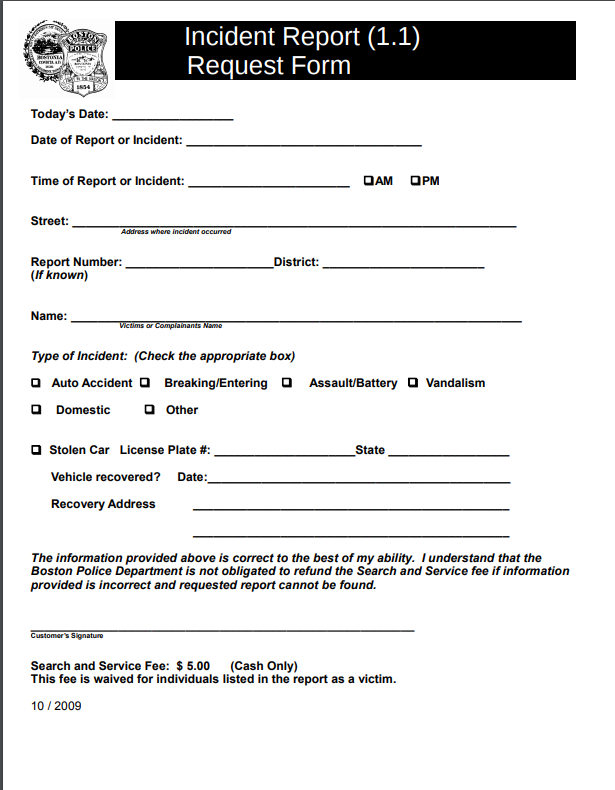

Formulário baixado do site https://bpdnews.com/resources

- Analisando a variável **STREET**

In [ ]:
display(missing_data)

Analisando a variável **STREET**, identifiquei que semelhante ao ocorrido **Lat** e **Long**, nesta variável em alguns casos, onde a variável **Location** recebeu o valor (0.00000000, 0.00000000) ou (-1.00000000, -1.00000000) esta variável recebeu uma missning value 'NaN', entretanto, nesta variável identifiquei que há um atenuante, em muitos dos casos há a coordenada, entretanto, não há o nome da rua, **STREET**, consultando algumas das cordenadas comecei a identificar um padrão, indentifiquei que a localizção dos registros apontavam para cruzmento de ruas e avenidas, esquinas, ou ruas de fato sem nome vinculado, por isso o não preenchimento.

In [ ]:
df[df['STREET'].isnull()].sample(10).T

In [ ]:
df[df['STREET'].isnull() & ~df['Lat'].isnull()].T

In [ ]:
coordinates = df[df['STREET'].isnull() & np.logical_and(~df['Lat'].isnull(), df['Lat'] != (-1))][['Lat', 'Long']].sample(100).reset_index()

In [ ]:
coordinates

In [ ]:
# alguns pontos no mapa que comprovam o informado acima: Alguns dos pontos onde temos a localidade, mas não temos o nome da rua, resultando assim missing values.
mapa_unamed_unknown_streets = folium.Map(location=[42.3567081,-71.0623494], zoom_start=14)
for i, lat, long in zip(coordinates['index'], coordinates['Lat'], coordinates['Long']):
    folium.Marker([lat, long], popup='{}'.format(i)).add_to(mapa_unamed_unknown_streets)
display(mapa_unamed_unknown_streets)

Nesta variável, seria interessante imputar todos os valores faltosos com 'Cruzamento/Esquina', por exemplo, e através de um Web scraping identificar as coordenadas que apontam para uma rua sem nome e imputar estes campos com ***Unamed_Street***.

- Analisando a variável **DISTRICT**

In [ ]:
display(missing_data)

Analisando a variável **DISTRICT** identifiquei que o motivo que ocasionou aproximadamente 99% dos missing values foi a falta dos valores relacionados à localização do ocorrido ou do reporte do mesmo, em alguns casos há alguns destes dados como por exemplo a rua e a identificação da área onde fora feito o reporte **REPORTING_AREA**, entretanto, para esta mesma rua, avenida e área de reporte há mais de um **DISTRICT** responsável, fazendo com que ficassem em branco este campos.<br/>
Já em relação aos outros valores que ficaram faltando não consegui identificar nenhum padrão o que me fez supor que fora apenas um erro na hora da entrada do registro.

#### Distrito A-1 , Distrito A-15

* Serve: Downtown , Beacon Hill , Charlestown (investigações e serviço comunitário), Chinatown , North End , West End , Leather District , Bay Village e Downtown Waterfront.
* População servida: 55,971
* Endereço da estação: 40 Sudbury St., Boston, MA 02114
* Comandado por: Capitão Kenneth Fong

#### Distrito A-7

* Serve: East Boston
* População servida: 40,508
* Endereço da estação: 69 Paris St., East Boston, MA 02128
* Comandado por: Capitão Kelly J. McCormick / Co-Capitão Sargento Michael Harrington

#### Distrito B-2

* Serve: Roxbury / Mission Hill
* População servida: 76,917
* Endereço da estação: 2400 Washington St., Roxbury, MA 02119
* Comandado por: Captain Leighton Facey

#### Distrito B-3

* Serve: Mattapan / North Dorchester
* População servida: 36,480
* Endereço da estação: 1165 Blue Hill Ave., Dorchester, MA 02124
* Comandado por: Capitão Haseeb Hosein

#### Distrito C-6

* Serve: South Boston
* População servida: 35,200
* Endereço da estação: 101 W. Broadway, South Boston, MA 02127
* Comandado por: Capitão Joseph Boyle

#### Distrito C-11

* Serve: Dorchester
* População servida: 91,982
* Endereço da estação: 40 Gibson St., Dorchester, MA 02122
* Comandado por: Capitão Steven McLaughlin

#### Distrito D-4

* Serve: Back Bay / South End / Fenway
* População atendida: 77.773
* Endereço da estação: 650 Harrison Ave., Boston, MA 02116
* Comandado por: Capitão Steven Sweeney

#### Distrito D-14

* Serve: Allston / Brighton
* População servida: 74,997
* Endereço da estação: 301 Washington St., Boston, MA 02135
* Comandado por: Capitão Paul Russell

#### Distrito E-5

* Serve: West Roxbury / Roslindale
* População servida: 50,983
* Endereço da estação: 1708 Center St., Boston, MA 02132
* Comandado por: Capitão Therese Kozmiski

#### Distrito E-13

* Serve: Jamaica Plain
* População servida: 37,468
* Endereço da estação: 3345 Washington St., Jamaica Plain, MA 02130
* Comandado por: Capitão em exercício John Greland

#### Distrito E-18

* Serve: Hyde Park
* População servida: 30,631
* Endereço da estação: 1249 Hyde Park Ave., Hyde Park, MA 02136
* Comandado por: Capitão Joseph Gillespie

[Wikipedia](https://en.wikipedia.org/wiki/Boston_Police_Department)

In [ ]:
# Uma amostra dos registros que possuem valor faltando na variável DISTRICT
df[df['DISTRICT'].isnull()].sample(10).T

In [ ]:
#Verificando os dados que possuem dados faltando na variável DISTRICT, REPORTING_AREA, Lat, Long e Location.
missing_values_district = df[np.logical_and(df['DISTRICT'].isnull(), 
                                            np.logical_or(df['REPORTING_AREA'] == ' ', 
                                                          np.logical_or(np.logical_or(df['Location'] == '(-1.00000000, -1.00000000)', 
                                                                                      df['Location'] == '(0.00000000, 0.00000000)'), df['STREET'].isnull())))]
missing_values_district.T

In [ ]:
#Criando o dataframe com a quantidade de valores missing respeitando as proposições informadas anteriormente e porcentagem que ela representa do total de valores missings.
tese_explanation = np.round(pd.concat([missing_values_district[['DISTRICT']].isnull().sum(), missing_values_district[['DISTRICT']].isnull().sum() / df[df['DISTRICT'].isnull()]['DISTRICT'].isnull().count() * 100],
          axis=1, keys=('Total', 'Porcentagem'), sort=False),2)


In [ ]:
display(missing_data)

In [ ]:
display(tese_explanation)

In [ ]:
#Verificando quais registros possuem valores missing na variável DISTRICT, entretanto não foram explicados pela proposição
df.loc[set(df[df['DISTRICT'].isnull()].index) - set(missing_values_district.index.values.tolist())].T

Na imputação dos dados que aparentemente ficaram nulos por erro de entrada na hora do registro, como creio ser o caso do registro de número 420054 basta imputarmos o distrito responsável por aquela área de reporte em interseção com o distrito responsável por aquela rua ou aveninada.

In [ ]:
df[df['STREET'] == 'WASHINGTON ST']['DISTRICT'].value_counts()

In [ ]:
display(df[df['REPORTING_AREA'] == '714']['DISTRICT'].value_counts())

Neste caso o **DISTRICT** responsável ficaria sendo o distrito E5

Já em relação à imputação deste dado nos registros que têm os campos de localização do reporte e do ocorrido preenchido, entretanto estes possuem mais de um distrito responsável, uma arvore de decisão talvés fosse a melhor opção.
Já em relação aos outros registros que não possuem nenhum destes campos preenchidos, o interessante neste caso seria imputar com 'Distrito desconhecido' para não perder as outras informações. 

In [ ]:
display(df[df['STREET'] == 'GARFIELD AVE']['DISTRICT'].value_counts())
display(df[df['STREET'] == 'TOMAHAWK DR']['DISTRICT'].value_counts())
display(df[df['STREET'] == 'COMMONWEALTH AVE']['DISTRICT'].value_counts())
display(df[df['STREET'] == 'CONDOR ST']['DISTRICT'].value_counts())

In [ ]:
display(df[df['REPORTING_AREA'] == '796']['DISTRICT'].value_counts())

- variável **UCR_PART**

In [ ]:
display(missing_data)

Considerando que Part One UCR relataram incidentes de crimes de índice que são divididos em duas categorias: crimes violentos e de propriedade. Assalto agravado , forçada estupro , assassinato e roubo são classificados como violentos, enquanto incêndio, roubo, furto e roubo de veículos são classificados como crimes contra a propriedade. <br/>
E considerando que Parte Two, são relatadas as seguintes categorias: assalto simples, ofensas toque de recolher e vadiagem, peculato, falsificação e contrafacção, conduta desordeira, dirigir sob a influência, delitos de drogas, fraude, jogos de azar, crimes de bebidas alcoólicas, ofensas contra a família, a prostituição, embriaguez , fugitivos, crimes sexuais, propriedade roubada, vandalismo e crimes de armas.<br/>
Podemos concluir que os campos que estão missing na variável **UCR_PART** são aqueles campos que fazem parte de registros que não são reportados para este programa.<br/>
Com exceção apenas dos registros onde na variável **OFFENSE_DESCRIPTION** temos INVESTIGATE PERSON, pois neste caso, segundo o padrão que o data set vem seguindo, este deviria receber PART THREE na variável **UCR_PART**

https://en.wikipedia.org/wiki/Uniform_Crime_Reports

In [ ]:
df[df['UCR_PART'].isnull()]['OFFENSE_DESCRIPTION'].value_counts()

In [ ]:
df[np.logical_and(df['OFFENSE_DESCRIPTION'] == 'HOME INVASION', ~df['UCR_PART'].isnull())]['UCR_PART'].value_counts()

In [ ]:
df[np.logical_and(df['OFFENSE_DESCRIPTION'] == 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS', ~df['UCR_PART'].isnull())]['UCR_PART'].value_counts()

In [ ]:
df[np.logical_and(df['OFFENSE_DESCRIPTION'] == 'INVESTIGATE PERSON', ~df['UCR_PART'].isnull())]['UCR_PART'].value_counts()

In [ ]:
df[np.logical_and(df['OFFENSE_DESCRIPTION'] == 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', ~df['UCR_PART'].isnull())]['UCR_PART'].value_counts()

Existe neste dataset nesta variável, um terceiro valor além de PART I e PART II, nesta variável encontramos também o valor PART III, entretanto não consegui indentificar mais especificamente o que este valor significa.

## Quantidade de registros

In [ ]:
df.sample(10).T

In [ ]:
df.info()

>  <h1>Crimes violentos caíram em Boston em 2018; taxa de homicídios mantida estável</h1>
_bostonglobe.com_<br/>
<br/>
Os crimes violentos em Boston caíram em 2018 em relação ao ano anterior, com a taxa de homicídios basicamente se mantendo estável e o número total de vítimas fatais e não fatais de tiros diminuindo cerca de 22%, de acordo com estatísticas da polícia divulgadas segunda-feira.<br/>

[...]

> William G. Gross disse na segunda-feira que prisões e crimes podem diminuir simultaneamente "por causa de programas e iniciativas da [cidade]" projetados para ajudar jovens em risco.
"Como sempre, queremos derrubar a violência juvenil sem sentido, derrubar o número de homicídios", disse Gross, acrescentando que assassinatos não resolvidos continuam sendo uma prioridade para seu departamento. “Nós não dizemos 'casos frios'. É 'não resolvido', e é por isso que é tão importante que as pessoas confiem em nós para apresentar informações. ”

<a href='https://www.bostonglobe.com/metro/2018/12/31/violent-crime-down-boston-homicide-rate-held-steady/QgtoUPvoVsFs2xdIBbSNIN/story.html'>Link da matéria</a>

In [ ]:
f, ax = plt.subplots(figsize=(20,4))
df.groupby('YEAR')['INCIDENT_NUMBER'].count().plot()
plt.ylabel('Quantidade de Ocorrências registradas')
plt.xlabel('Ano')
plt.grid()

In [ ]:
df_2015 = df.where(df['YEAR'] == 2015)
df_2016 = df.where(df['YEAR'] == 2016)
df_2017 = df.where(df['YEAR'] == 2017)
df_2018 = df.where(df['YEAR'] == 2018)
df_2019 = df.where(df['YEAR'] == 2019)

In [ ]:
df_2015_month = df_2015['MONTH'].value_counts()
df_2016_month = df_2016['MONTH'].value_counts()
df_2017_month = df_2017['MONTH'].value_counts()
df_2018_month = df_2018['MONTH'].value_counts()
df_2019_month = df_2019['MONTH'].value_counts()

Analisando os gráficos a seguir podemos verificar que o ano que mais teve uma constância na quantidade de ocorrência foi o ano de 2016 onde o desvio padrão entre a quantidade de ocorrências registradas por mês foi a menor, std = 455.24;<br/>
Em contrapartida o ano de 2015 foi o que mais teve oscilação neste quesito, std = 1540.41;<br/>
O ano que teve o ano que possui o mês que mais registrou ocorrência foi o ano de 2017, quando no mês de agosto foram registradas 9251.00 ocorrências, contrastando com Outubro de 2015 quando houveram apenas 4200.00 ocorrências, quntidade de ocorrências esta que puxou a média deste ano, 2015, para o menor patamar entre todos os anos em questão, 7656.71 ocorrências.

In [ ]:
display(np.round(df_2015_month.describe(),2))
display(np.round(df_2016_month.describe(),2))
display(np.round(df_2017_month.describe(),2))
display(np.round(df_2018_month.describe(),2))
display(np.round(df_2019_month.describe(),2))

In [ ]:
f, ax = plt.subplots(figsize=(15,15))

plt.subplot(5,2,1)
df_2015_month.describe().plot(kind='bar')
plt.title('2015')
plt.grid()

plt.subplot(5,2,2)
df_2016_month.describe().plot(kind='bar')
plt.title('2016')
plt.grid()

plt.subplot(5,2,3)
df_2017_month.describe().plot(kind='bar')
plt.title('2017')
plt.grid()

plt.subplot(5,2,4)
df_2018_month.describe().plot(kind='bar')
plt.title('2018')
plt.grid()

plt.subplot(5,2,5)
df_2019_month.describe().plot(kind='bar')
plt.title('2019')
plt.grid()

plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(20,10))

plt.subplot(5,1,1)
sns.lineplot(x=df_2015['MONTH'].dropna().unique(), y=df_2015['MONTH'].value_counts(), color='r')
plt.title('2015')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

plt.subplot(5,1,2)
sns.lineplot(x=df_2016['MONTH'].dropna().unique(), y=df_2016['MONTH'].value_counts(), color='b')
plt.title('2016')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

plt.subplot(5,1,3)
sns.lineplot(x=df_2017['MONTH'].dropna().unique(), y=df_2017['MONTH'].value_counts(), color='g')
plt.title('2017')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

plt.subplot(5,1,4)
sns.lineplot(x=df_2018['MONTH'].dropna().unique(), y=df_2018['MONTH'].value_counts(), color='y')
plt.title('2018')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

plt.subplot(5,1,5)
sns.lineplot(x=df_2019['MONTH'].dropna().unique(), y=df_2019['MONTH'].value_counts(), color='c')
plt.title('2019')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

plt.show()


In [ ]:
df.info()

Verificando a quantidade de ocorrências por dia, identifiquei que o dia que mais há ocorrências registradas é na sexta feira, talves um fato que contribua para isto seja o fato dos pagamentos geralmente serem feitos nas sextas feiras. 
Em contraste há o domingo com 53771, a menor quantidade registrada.

In [ ]:
df['DAY_OF_WEEK'].value_counts().plot(kind='barh')

Em um contexto geral os horários que mais possuem ocorrências são as 16 17 18 horas, possivelmente por se tratar dos horários de maior circulação nas ruas.

In [ ]:
df['HOUR'].value_counts()[:10]

Mesmo não servindo a maior quantiddade de pessoas, característica esta do distrito C11 atualmente, o distrito B2 tem a maior quantidade de ocorrência registrada até o momento.
Já em relação ao distrito que menos possui ocorrências registradas no decorrer da série temporal, temos o distrito A15, que juntamente com o Distrito A1 serve aproximadamente 50 mil pessoas.
Vale ressaltar que mesmo o distrito A1 tendo o auxílio do distrito A15, ainda assim está como um dos que mais registra ocorrências.

In [ ]:
df['DISTRICT'].value_counts().plot(kind='barh')

In [ ]:
df_2015_nona = df_2015.dropna()
df_2016_nona = df_2016.dropna().sample(int(50/100* df_2016['INCIDENT_NUMBER'].count()))
df_2017_nona = df_2017.dropna().sample(int(50/100* df_2017['INCIDENT_NUMBER'].count()))
df_2018_nona = df_2018.dropna().sample(int(50/100* df_2018['INCIDENT_NUMBER'].count()))
df_2019_nona = df_2019.dropna().sample(int(70/100* df_2019['INCIDENT_NUMBER'].count()))

In [ ]:
places = []
mapa_offenses_2015 = folium.Map(location=[42.3546817,-70.9768088], zoom_start=11.5)
for i, line in df_2015_nona.iterrows():
    places.append((line['Lat'], line['Long']))

HeatMap(places, radius=6).add_to(mapa_offenses_2015)
display(mapa_offenses_2015)

In [ ]:
places = []
mapa_offenses_2016 = folium.Map(location=[42.3546817,-70.9768088], zoom_start=11.5)
for i, line in df_2016_nona.iterrows():
    places.append((line['Lat'], line['Long']))

HeatMap(places, radius=6).add_to(mapa_offenses_2016)
display(mapa_offenses_2016)

In [ ]:
places = []
mapa_offenses_2017 = folium.Map(location=[42.3546817,-70.9768088], zoom_start=11.5)
for i, line in df_2017_nona.iterrows():
    places.append((line['Lat'], line['Long']))

HeatMap(places, radius=6).add_to(mapa_offenses_2017)
display(mapa_offenses_2017)

In [ ]:
places = []
mapa_offenses_2018 = folium.Map(location=[42.3546817,-70.9768088], zoom_start=11.5)
for i, line in df_2018_nona.iterrows():
    places.append((line['Lat'], line['Long']))

HeatMap(places, radius=6).add_to(mapa_offenses_2018)
display(mapa_offenses_2018)

In [ ]:

places = []
mapa_offenses_2019 = folium.Map(location=[42.3546817,-70.9768088], zoom_start=11.5)
for i, line in df_2019_nona.iterrows():
    places.append((line['Lat'], line['Long']))

HeatMap(places, radius=6).add_to(mapa_offenses_2019)
display(mapa_offenses_2019)


Analisando estes gráficos percebi que a grande parte das ocorrências registradas foram registradas nos centros urbanos.

![](http://)Tendo em vista que as variáveis **OFFENSE_CODE**, **OFFENSE_CODE** e **OFFENSE_DESCRIPTION** oferencem praticamente a mesma informação, com a diferença apenas que **OFFENSE_CODE** e **OFFENSE_DESCRIPTION**, oferecem uma descrição maior do ocorrido, enquanto **OFFENSE_CODE_GROUP** apresenta uma descrição mais generalizada.
Conseiderarei nas análises a variável **OFFENSE_CODE_GROUP**.

In [ ]:
text_2015 = str(df_2015['OFFENSE_CODE_GROUP'].dropna().tolist())
text_2016 = str(df_2016['OFFENSE_CODE_GROUP'].dropna().tolist())
text_2017 = str(df_2017['OFFENSE_CODE_GROUP'].dropna().tolist())
text_2018 = str(df_2018['OFFENSE_CODE_GROUP'].dropna().tolist())
text_2019 = str(df_2019['OFFENSE_CODE_GROUP'].dropna().tolist())

In [ ]:
wordcloud = WordCloud(max_font_size=100, 
                      width = 1520, 
                      height = 535).generate(text_2015)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(max_font_size=100, 
                      width = 1520, 
                      height = 535).generate(text_2016)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(max_font_size=100, 
                      width = 1520, 
                      height = 535).generate(text_2017)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(max_font_size=100, 
                      width = 1520, 
                      height = 535).generate(text_2018)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(max_font_size=100, 
                      width = 1520, 
                      height = 535).generate(text_2019)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()